### Preliminary analysis on Airbnb Boston dataset 

#### Dependencies

In [1]:
import numpy as np
import pandas as pd
import os,sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Data loading and data description

In [2]:
os.chdir(r"C:\Users\1523774\Desktop\Ganbold\udacity dsnd\projects\Blog Post")
boston_airbnb = pd.read_csv("boston-airbnb-open-data/listings.csv")
print("Shape:", boston_airbnb.shape)
display(boston_airbnb.head())
display(boston_airbnb.describe())

Shape: (3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


#### Cleaning and preparing data 

In the below cell, I remove columns whose 20% or more values are NaNs. 20% threshold chosen based on my experience and it is usually not best practice use features for further analysis which contains more than 20% artificially imputed values. so I entirely ignore them as they did not exist.   
For features which possess less than 20% missing value, I simply delete the missing value records from the dataset. Although there are many options a dn methods for imputation, they may create bias for the analytics if you won't not choose wisely and carefully. To avoid that risk, often times simply deleting and cleaning them out from the dataset leads to better results.

In [3]:
# Removing columns whose 20% or more values are Nans
columns = boston_airbnb.columns
new_cols = columns[(boston_airbnb.isnull().sum()/len(boston_airbnb)*100 < 20)].tolist()

#Droppping NaNs for remaining columns
boston = boston_airbnb[new_cols].dropna()
#Price
boston['price'] = boston['price'].str.replace('$', '')
boston['price'] = boston['price'].astype(float)
num_cols = boston._get_numeric_data().columns. tolist()

### Q1: Where is cheaper/costly place to stay in Boston? 

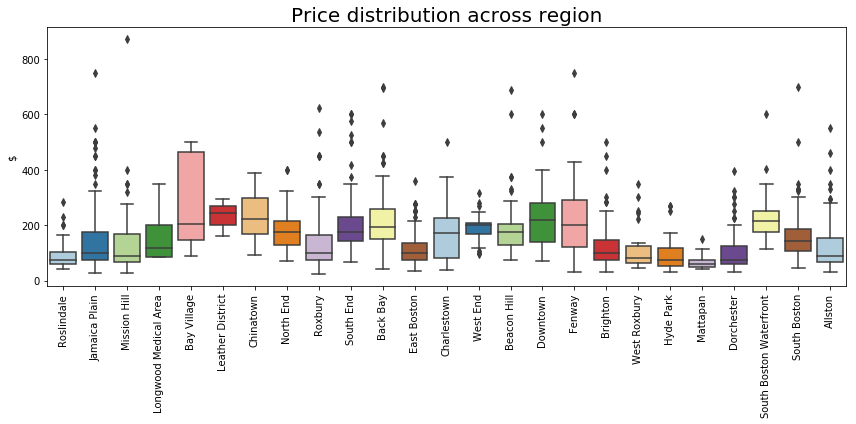

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price', data = boston, palette='Paired')
plt.xticks(rotation=90)
plt.title("Price distribution across region", fontsize=20)
plt.ylabel("$")
plt.xlabel('')
plt.tight_layout()
plt.savefig("price_region.png")
plt.show()


##### Visual explorations

In [5]:
#creating heatmap function to use visual exploration

def heatmap(df, col1, col2):
    '''
    Args: 
        df(DataFrame): a dataframe containg the data
        col1(str): first column from the dataframe to be used for heatmap
        col2((str): second column from the dataframe to be used for heatmap
    output:
        plots heatmap of col1 and col2
    '''
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.groupby([col1, col2]).price.mean().unstack(), annot=True, fmt='.1f', cmap = 'Greens')
    plt.ylabel("")
    plt.title('{} vs {}'.format(col1, col2))
    plt.show()
    
    print('.........................................................................................')

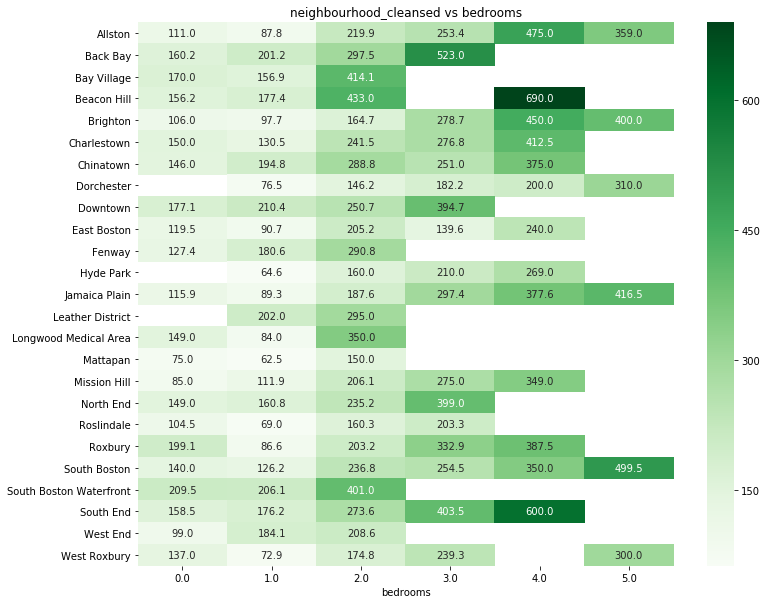

.........................................................................................


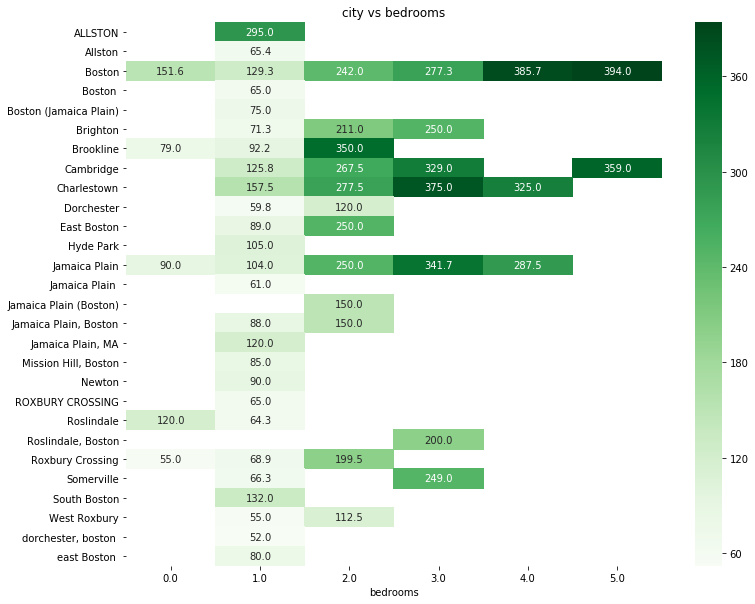

.........................................................................................


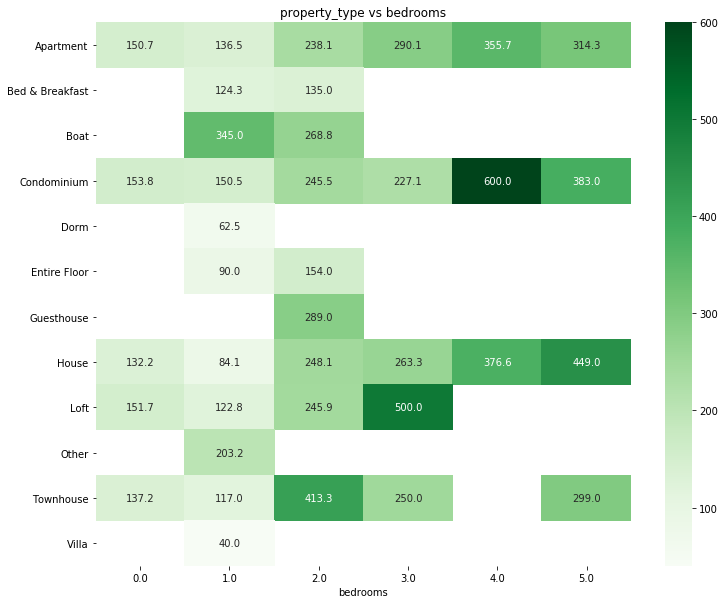

.........................................................................................


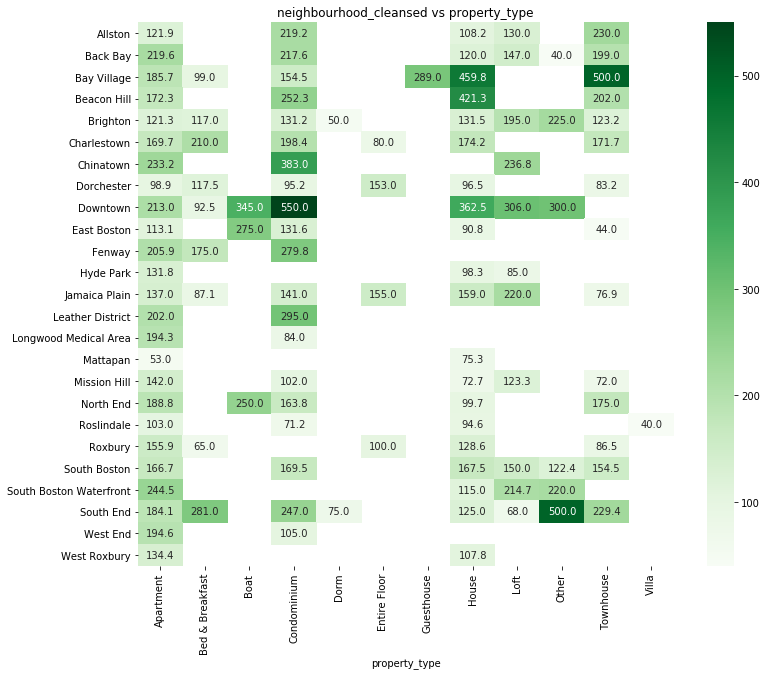

.........................................................................................


In [6]:
#Price by the combination of region and number of bedrooms
heatmap(boston, 'neighbourhood_cleansed', 'bedrooms')
#Price by the combination of city and number of bedrooms
heatmap(boston, 'city', 'bedrooms')
#Price by the combination of property_type and number of bedrooms
heatmap(boston, 'property_type', 'bedrooms')
#Price by the combination of property_type and neighbourhood_cleansed
heatmap(boston, 'neighbourhood_cleansed', 'property_type')

#### Loading Calendar dataset

In [7]:
boston_cal = pd.read_csv("boston-airbnb-open-data/calendar.csv")
# Splitting dates
splitted = pd.DataFrame()
splitted['year'] = pd.to_datetime(boston_cal['date']).dt.year
splitted['month'] = pd.to_datetime(boston_cal['date']).dt.month
splitted['dayofweek'] = pd.to_datetime(boston_cal['date']).dt.dayofweek
#display(splitted.head())
cal = boston_cal.join(splitted)
print('Shape:', cal.shape)
display(cal.head())

Shape: (1308890, 7)


,listing_id,date,available,price,year,month,dayofweek
0,12147973,2017-09-05,f,NaN,2017,9,1
1,12147973,2017-09-04,f,NaN,2017,9,0
2,12147973,2017-09-03,f,NaN,2017,9,6
3,12147973,2017-09-02,f,NaN,2017,9,5
4,12147973,2017-09-01,f,NaN,2017,9,4


### Q2: When is it cheap/expensive to stay in Airbnb Boston?

#### Preparing data

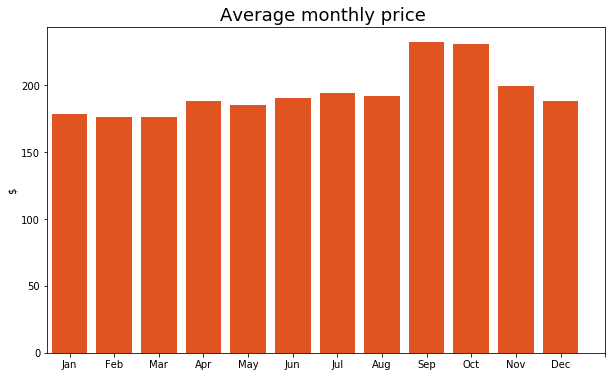

In [8]:
#Converting price column into numeric
cal['price'] = cal['price'].str.replace("$", "")
cal['price']=pd.to_numeric(cal['price'],errors='coerce')

#Average monthly price
monthly_price = cal[['price', 'month']]
monthly_price_mean = monthly_price.groupby('month').mean()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_price_mean.index.tolist(), y='price', data=monthly_price_mean, color='orangered', )
plt.ylabel("$")
plt.title('Average monthly price ', fontsize=18)
plt.xticks( np.linspace(0,12, 13),['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                   'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig("month_price.png")
plt.show()

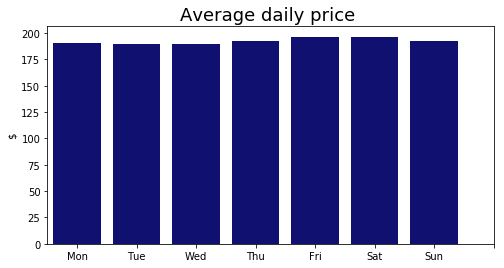

In [9]:
#Daily average price
daily_price = cal[['price', 'dayofweek']]
daily_price_mean = daily_price.groupby('dayofweek').mean()
plt.figure(figsize=(8,4))
sns.barplot(x=daily_price_mean.index.tolist(), y='price', data=daily_price_mean, color='navy')
plt.ylabel("$")
plt.title('Average daily price ', fontsize=18)
plt.xticks( np.linspace(0,7, 8),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.savefig("daily_price.png")
plt.show()

#### Data preparation for Predictive modelling of Airbnb price

In [10]:
#Using Listing dataset
num_cols = boston._get_numeric_data().columns
cat_cols = list(set(boston.columns) - set (num_cols))

#Short-listing features based on domain knowledge
cat_features = ['bed_type','host_is_superhost', 'room_type', 'cancellation_policy']
num_features = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']

dummies = pd.get_dummies(boston[['bed_type', 'room_type', 'cancellation_policy']])
mapping = {'t': 1, 'f': 0}
dummies = dummies.join(boston.host_is_superhost.map(mapping))


X = boston[num_features].join(dummies)
y = boston['price']

display(X.join(y).head())
print(X.shape)

,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,host_is_superhost,price
1,42.286241,-71.134374,1.0,1.0,1.0,36,0,0,0,0,1,0,1,0,0,1,0,0,0,65.0
2,42.292438,-71.135765,1.0,1.0,1.0,41,0,0,0,0,1,0,1,0,0,1,0,0,1,65.0
4,42.284512,-71.136258,1.5,1.0,2.0,29,0,0,0,0,1,0,1,0,1,0,0,0,1,79.0
5,42.291690,-71.131893,1.0,1.0,1.0,8,0,0,0,0,1,0,1,0,1,0,0,0,1,75.0
7,42.281946,-71.141022,2.0,1.0,1.0,67,0,0,0,0,1,0,1,0,0,1,0,0,1,75.0


(2024, 19)


#### Model training and prediction

In [11]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

r2 = r2_score(pred, y_test)
print("Model performance(R2) : {:.02f}".format(r2))

Model performance(R2) : 0.30


### Q3: What is the most important factor for Airbnb price in Boston?

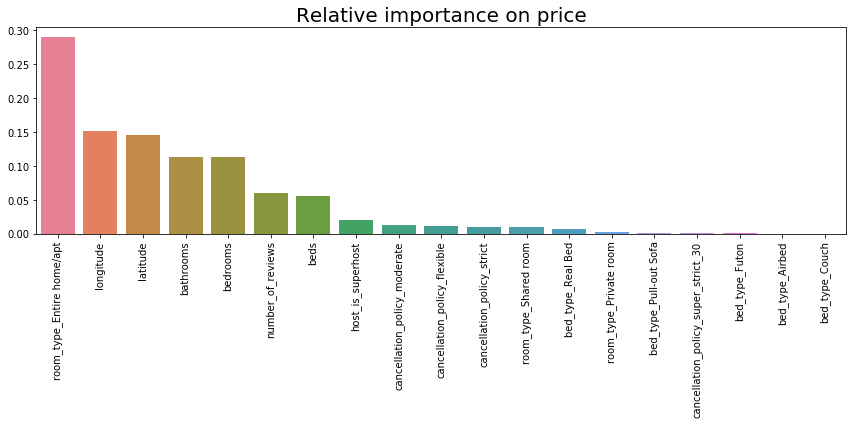

In [12]:
#Calculating feature importance from the trained model
len(model.feature_importances_)
fea_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x = fea_imp.index, y = 'importance', data=fea_imp, palette="husl")
plt.xticks(rotation=90)
plt.ylabel("")
plt.title('Relative importance on price',fontsize=20)
plt.tight_layout()
plt.savefig("fea_importance.png")
plt.show()

#####  End of the notebook